In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf

import random

from keras import Model

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import numpy as np

import os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix

In [3]:
character_1best_files = []
token_1best_files = []
node_1best_files = []

character_2mid_files = []
token_2mid_files = []
node_2mid_files = []

character_3mid_files = []
token_3mid_files = []
node_3mid_files = []

character_4worst_files = []
token_4worst_files = []
node_4worst_files = []

character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"
node_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_1best"

character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"
node_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_2mid"


character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"
node_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_3mid"


character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"
node_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Node\Users\pauld\PycharmProjects\DeepCRMFYP\RankedClasses\results_4worst"


for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_1best_file_path):
    for filename in filenames:
        node_1best_files.append(os.path.join(parent, filename))        
        
        
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_2mid_file_path):
    for filename in filenames:
        node_2mid_files.append(os.path.join(parent, filename))        
  


for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(node_3mid_file_path):
    for filename in filenames:
        node_3mid_files.append(os.path.join(parent, filename))        
        
        
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(node_4worst_file_path):
    for filename in filenames:
        node_4worst_files.append(os.path.join(parent, filename))        

In [4]:
def matrixFileToMatrix(files, matrixList):
    for file in files:
        matrix = []
        with open(file, 'r') as f:
            matrix = [[float(num) for num in line.split(',') if num != "\n"][:154] for line in f ]
        matrixList.append(np.array(matrix))

In [5]:
random.seed(100)
character_1best_files = random.sample(character_1best_files, k = 2000)
random.seed(100)
token_1best_files = random.sample(token_1best_files, k= 2000)
random.seed(100)
node_1best_files = random.sample(node_1best_files, k= 2000)

random.seed(100)
character_2mid_files = random.sample(character_2mid_files, k = 2000)
random.seed(100)
token_2mid_files = random.sample(token_2mid_files, k= 2000)
random.seed(100)
node_2mid_files = random.sample(node_2mid_files, k= 2000)

random.seed(100)
character_3mid_files = random.sample(character_3mid_files, k = 2000)
random.seed(100)
token_3mid_files = random.sample(token_3mid_files, k= 2000)
random.seed(100)
node_3mid_files = random.sample(node_3mid_files, k= 2000)

In [6]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []
best1_input_nodes = []
mid2_input_nodes = []
mid3_input_nodes = []
worst4_input_nodes = []

matrixFileToMatrix(character_1best_files, best1_input_chars)
matrixFileToMatrix(token_1best_files, best1_input_tokens)
matrixFileToMatrix(node_1best_files, best1_input_nodes)

print("done")

matrixFileToMatrix(character_2mid_files, mid2_input_chars)
matrixFileToMatrix(token_2mid_files, mid2_input_tokens)
matrixFileToMatrix(node_2mid_files, mid2_input_nodes)

print("done")

matrixFileToMatrix(character_3mid_files, mid3_input_chars)
matrixFileToMatrix(token_3mid_files, mid3_input_tokens)
matrixFileToMatrix(node_3mid_files, mid3_input_nodes)

print("done")

matrixFileToMatrix(character_4worst_files, worst4_input_chars)
matrixFileToMatrix(token_4worst_files, worst4_input_tokens)
matrixFileToMatrix(node_4worst_files, worst4_input_nodes)

done
done
done


In [7]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

input4_nodes_x = []
input4_nodes_y = []

for x in best1_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,0,0,1])

for x in mid2_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,0,1,0])
    
for x in mid3_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,1,0,0])

for x in worst4_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([1,0,0,0])



for x in best1_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0, 0,0, 1])

for x in mid2_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,0,1,0])

for x in mid3_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,1,0,0])

for x in worst4_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([1,0,0,0])
   



for x in best1_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([0,0,0,1])

for x in mid2_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([0,0,1,0])

for x in mid3_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([0,1,0,0])

for x in worst4_input_nodes:
    input4_nodes_x.append(x)
    input4_nodes_y.append([1,0,0,0])

In [8]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []
best1_input_nodes = []
mid2_input_nodes = []
mid3_input_nodes = []
worst4_input_nodes = []

In [9]:
input4_characters_x = np.array(input4_characters_x)
input4_characters_y = np.array(input4_characters_y)

input4_tokens_x = np.array(input4_tokens_x)
input4_tokens_y = np.array(input4_tokens_y)

input4_nodes_x = np.array(input4_nodes_x)
input4_nodes_y = np.array(input4_nodes_y)

In [10]:
print(input4_characters_x.shape)
print(input4_characters_y.shape)

print(input4_tokens_x.shape)
print(input4_tokens_y.shape)

print(input4_nodes_x.shape)
print(input4_nodes_y.shape)

(7076, 496, 154)
(7076, 4)
(7076, 496, 154)
(7076, 4)
(7076, 496, 154)
(7076, 4)


In [11]:
input4_characters_x, input4_characters_y = shuffle(input4_characters_x, input4_characters_y, random_state=0)

input4_tokens_x, input4_tokens_y = shuffle(input4_tokens_x, input4_tokens_y, random_state=0)

input4_nodes_x, input4_nodes_y = shuffle(input4_nodes_x, input4_nodes_y, random_state=0)

In [12]:
x_characters_train4, x_characters_test4, y_characters_train4, y_characters_test4 = train_test_split(
    input4_characters_x, input4_characters_y, test_size = 0.2, random_state=24)

#x_characters_train4, x_characters_valid4, y_characters_train4, y_characters_valid4 = train_test_split(
 #   x_characters_train4, y_characters_train4, test_size = 0.125, random_state=24)

x_tokens_train4, x_tokens_test4, y_tokens_train4, y_tokens_test4 = train_test_split(
    input4_tokens_x, input4_tokens_y, test_size = 0.2, random_state=24)

x_nodes_train4, x_nodes_test4, y_nodes_train4, y_nodes_test4 = train_test_split(
    input4_nodes_x, input4_nodes_y, test_size = 0.2, random_state=24)

In [13]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

input4_nodes_x = []
input4_nodes_y = []

In [16]:
batch_size = 64
epochs = 6

model_chars_input = Input((496,154,1))

model_chars = Conv2D(100, kernel_size=(2, 154), strides=(1,1),
                 activation='relu')(model_chars_input)
model_chars = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_chars)
model_chars = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_chars)
model_chars = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_chars)
model_chars = Flatten()(model_chars)

model_tokens_input = Input((496,154,1))

model_tokens = Conv2D(100, kernel_size=(2, 154), strides=(1,1),
                 activation='relu')(model_tokens_input)
model_tokens = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_tokens)
model_tokens = Conv2D(100, (2, 1), strides=(1,1), activation='relu')(model_tokens)
model_tokens = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_tokens)
model_tokens = Flatten()(model_tokens)

model_nodes_input = Input((496,154,1))

model_nodes = Conv2D(100, kernel_size=(8, 154), strides=(1,1),
                 activation='relu')(model_nodes_input)
model_nodes = Conv2D(100, (9, 1), strides=(1,1), activation='relu')(model_nodes)
model_nodes = Conv2D(100, (10, 1), strides=(1,1), activation='relu')(model_nodes)
model_nodes = MaxPooling2D(pool_size=(2, 1), strides=(2,1))(model_nodes)
model_nodes = Flatten()(model_nodes)

merged = Concatenate()([model_chars, model_tokens, model_nodes])
#merged = Dense(5, activation='relu')(merged)
merged = Dropout(0.5)(merged)
merged = Dense(4, activation='softmax')(merged)

model_combined4 = Model(inputs=[model_chars_input, model_tokens_input, model_nodes_input], outputs=[merged])

print(model_combined4.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_9 (InputLayer)           [(None, 496, 154, 1  0           []                               
                                )]                                                            

In [17]:
model_combined4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

combined4_fit = model_combined4.fit([x_characters_train4, x_tokens_train4, x_nodes_train4], y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=([x_characters_test4, x_tokens_test4, x_nodes_test4], y_characters_test4))
combined4_score = model_combined4.evaluate([x_characters_test4, x_tokens_test4, x_nodes_test4], y_characters_test4, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Epoch 1/6
89/89 [==============================] - 294s 3s/step - loss: 3.3698 - accuracy: 0.7081 - val_loss: 0.5744 - val_accuracy: 0.7860
Epoch 2/6
89/89 [==============================] - 247s 3s/step - loss: 0.5701 - accuracy: 0.7830 - val_loss: 0.5362 - val_accuracy: 0.7895
Epoch 3/6
89/89 [==============================] - 254s 3s/step - loss: 0.5359 - accuracy: 0.7931 - val_loss: 0.5485 - val_accuracy: 0.7733
Epoch 4/6
89/89 [==============================] - 248s 3s/step - loss: 0.5051 - accuracy: 0.7961 - val_loss: 0.5858 - val_accuracy: 0.7804
Epoch 5/6
89/89 [==============================] - 233s 3s/step - loss: 0.4686 - accuracy: 0.8095 - val_loss: 0.6148 - val_accuracy: 0.7818
Epoch 6/6
89/89 [==============================] - 252s 3s/step - loss: 0.4232 - accuracy: 0.8265 - val_loss: 0.6284 - val_accuracy: 0.7747
Test loss: 0.6284467577934265
Test accuracy: 0.7747175097465515


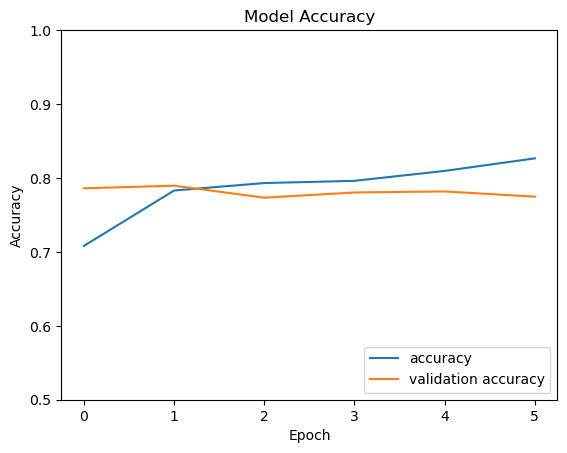

In [19]:
plt.plot(combined4_fit.history['accuracy'], label='accuracy')
plt.plot(combined4_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

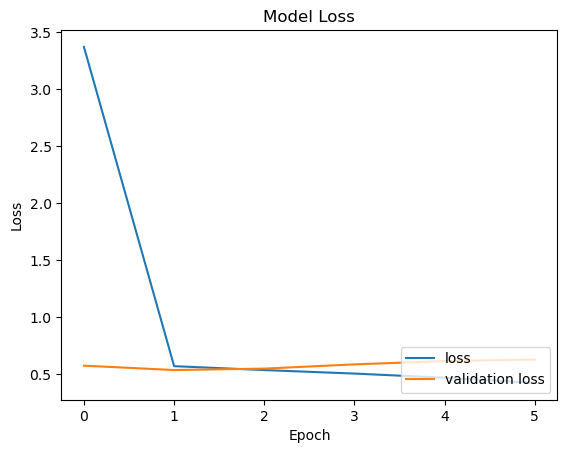

In [20]:
plt.plot(combined4_fit.history['loss'], label='loss')
plt.plot(combined4_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [21]:
mi_predict2 = model_combined4.predict([x_characters_test4, x_tokens_test4, x_nodes_test4])

45/45 [==============================] - 17s 340ms/step


In [22]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[167  48   1   0]
 [ 42 311  28   2]
 [  7  67 268  64]
 [  0  16  44 351]]


In [24]:
onemisclass = 42+67+44+48+28+64
twomisclass = 7+16+1+2
threemisclass =  0+0
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[293, 26, 0]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

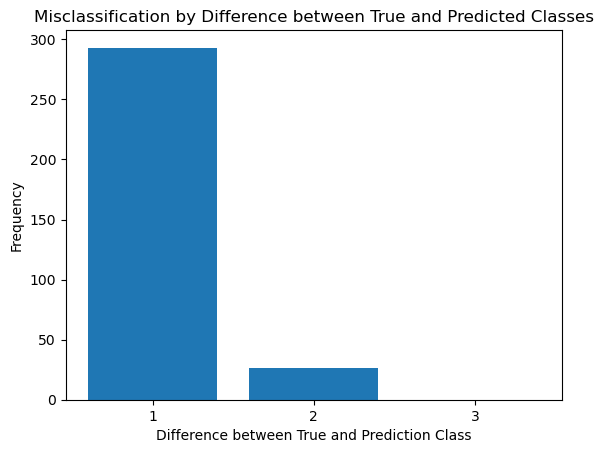

In [25]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

# Single Character Based

In [37]:
batch_size = 64
epochs = 6

model4 = Sequential()
model4.add(Conv2D(100, kernel_size=(2, 154),
                 activation='relu',
                 input_shape=(496,154,1)))
model4.add(Conv2D(100, (2, 1), activation='relu'))
model4.add(Conv2D(100, (2, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size= (2,1)))
model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(4, activation='softmax'))

print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 495, 1, 100)       30900     
                                                                 
 conv2d_27 (Conv2D)          (None, 494, 1, 100)       20100     
                                                                 
 conv2d_28 (Conv2D)          (None, 493, 1, 100)       20100     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 246, 1, 100)      0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 24600)             0         
                                                                 
 dropout_2 (Dropout)         (None, 24600)             0         
                                                      

In [29]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

character_fit = model4.fit(x_characters_train4, y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test4, y_characters_test4))
character_score = model4.evaluate(x_characters_test4, y_characters_test4, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Epoch 1/6
89/89 [==============================] - 54s 579ms/step - loss: 0.8484 - accuracy: 0.7025 - val_loss: 0.6077 - val_accuracy: 0.7599
Epoch 2/6
89/89 [==============================] - 49s 556ms/step - loss: 0.6426 - accuracy: 0.7473 - val_loss: 0.6167 - val_accuracy: 0.7790
Epoch 3/6
89/89 [==============================] - 53s 591ms/step - loss: 0.5891 - accuracy: 0.7631 - val_loss: 0.5808 - val_accuracy: 0.7832
Epoch 4/6
89/89 [==============================] - 58s 652ms/step - loss: 0.5668 - accuracy: 0.7802 - val_loss: 0.6427 - val_accuracy: 0.7853
Epoch 5/6
89/89 [==============================] - 64s 723ms/step - loss: 0.5143 - accuracy: 0.7906 - val_loss: 0.5868 - val_accuracy: 0.7853
Epoch 6/6
89/89 [==============================] - 59s 659ms/step - loss: 0.4864 - accuracy: 0.8027 - val_loss: 0.5959 - val_accuracy: 0.7881
Test loss: 0.5959420204162598
Test accuracy: 0.7881355881690979


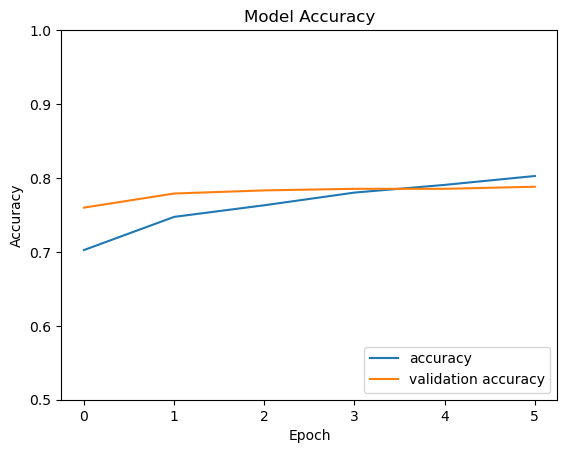

In [32]:
plt.plot(character_fit.history['accuracy'], label='accuracy')
plt.plot(character_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

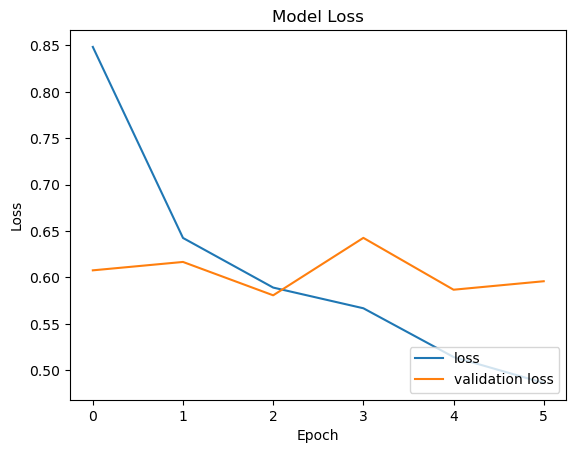

In [31]:
plt.plot(character_fit.history['loss'], label='loss')
plt.plot(character_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [33]:
mi_predict2 = model4.predict(x_characters_test4)

45/45 [==============================] - 5s 116ms/step


In [34]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[191  25   0   0]
 [ 51 301  30   1]
 [  8  60 296  42]
 [  1  18  64 328]]


In [35]:
onemisclass = 51+60+64+25+30+42
twomisclass = 8+18+0+1
threemisclass =  1+0
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[272, 27, 1]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

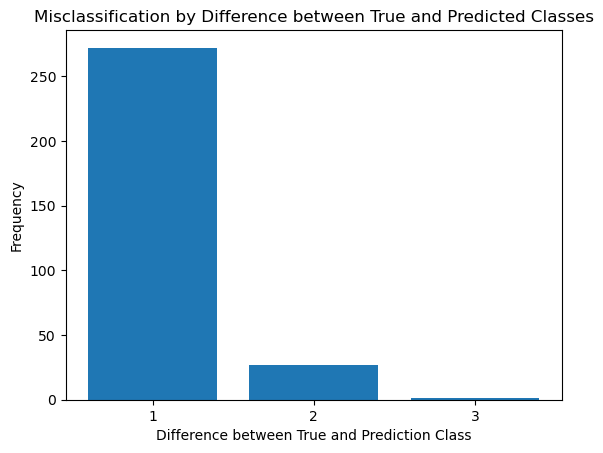

In [36]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

# Token Based

In [38]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

token_fit = model4.fit(x_tokens_train4, y_tokens_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test4, y_tokens_test4))
token_score = model4.evaluate(x_tokens_test4, y_tokens_test4, verbose=0)
print('Test loss:', token_score[0])
print('Test accuracy:', token_score[1])

Epoch 1/6
89/89 [==============================] - 59s 657ms/step - loss: 0.7639 - accuracy: 0.7168 - val_loss: 0.6284 - val_accuracy: 0.7747
Epoch 2/6
89/89 [==============================] - 54s 608ms/step - loss: 0.6243 - accuracy: 0.7534 - val_loss: 0.5555 - val_accuracy: 0.7924
Epoch 3/6
89/89 [==============================] - 56s 625ms/step - loss: 0.5695 - accuracy: 0.7705 - val_loss: 0.6050 - val_accuracy: 0.7874
Epoch 4/6
89/89 [==============================] - 53s 597ms/step - loss: 0.5350 - accuracy: 0.7871 - val_loss: 0.5370 - val_accuracy: 0.7853
Epoch 5/6
89/89 [==============================] - 57s 639ms/step - loss: 0.4882 - accuracy: 0.8048 - val_loss: 0.5484 - val_accuracy: 0.7832
Epoch 6/6
89/89 [==============================] - 58s 657ms/step - loss: 0.4558 - accuracy: 0.8147 - val_loss: 0.5881 - val_accuracy: 0.7980
Test loss: 0.588100016117096
Test accuracy: 0.7980226278305054


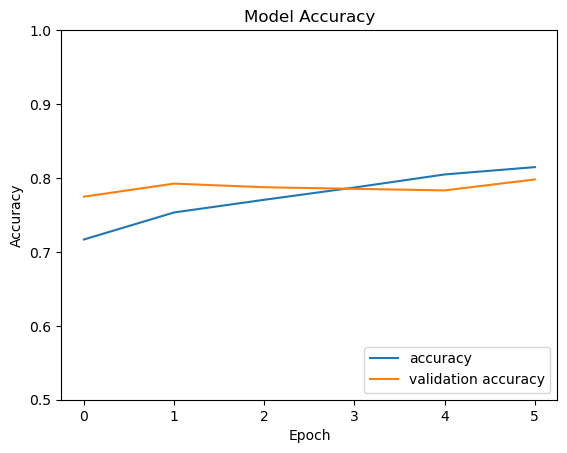

In [40]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

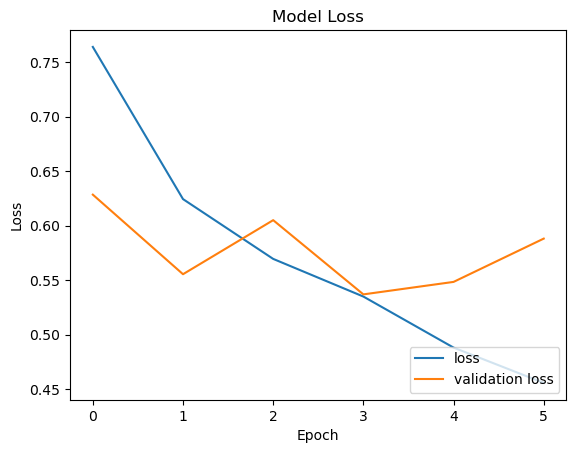

In [41]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [42]:
mi_predict2 = model4.predict(x_tokens_test4)

45/45 [==============================] - 7s 146ms/step


In [43]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_tokens_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[189  26   1   0]
 [ 54 286  43   0]
 [  6  50 329  21]
 [  1  15  69 326]]


In [44]:
onemisclass = 54+50+69+26+43+21
twomisclass = 6+15+1+0
threemisclass =  1+0
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[263, 22, 1]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

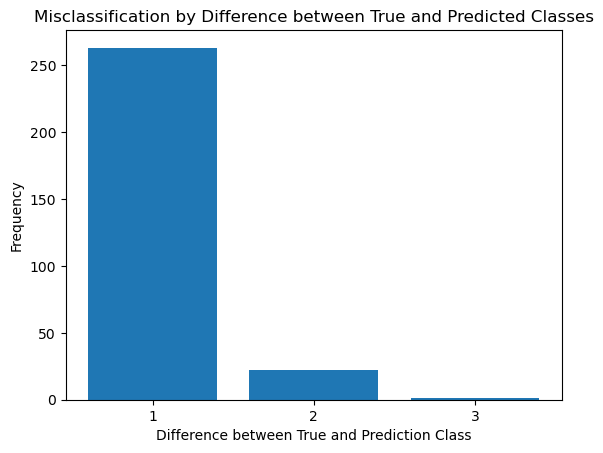

In [45]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

# Node Based

In [48]:
batch_size = 32
epochs = 6

model4 = Sequential()
model4.add(Conv2D(100, kernel_size=(8, 154),
                 activation='relu',
                 input_shape=(496,154,1)))
model4.add(Conv2D(100, (9, 1), activation='relu'))
model4.add(Conv2D(100, (10, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size= (2,1)))
model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(4, activation='softmax'))

print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 489, 1, 100)       123300    
                                                                 
 conv2d_33 (Conv2D)          (None, 481, 1, 100)       90100     
                                                                 
 conv2d_34 (Conv2D)          (None, 472, 1, 100)       100100    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 236, 1, 100)      0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 23600)             0         
                                                                 
 dropout_4 (Dropout)         (None, 23600)             0         
                                                      

In [49]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

token_fit = model4.fit(x_nodes_train4, y_nodes_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test4, y_tokens_test4))
token_score = model4.evaluate(x_tokens_test4, y_tokens_test4, verbose=0)
print('Test loss:', token_score[0])
print('Test accuracy:', token_score[1])

Epoch 1/6
177/177 [==============================] - 139s 772ms/step - loss: 1.5133 - accuracy: 0.6145 - val_loss: 4.0850 - val_accuracy: 0.2917
Epoch 2/6
177/177 [==============================] - 132s 744ms/step - loss: 0.8287 - accuracy: 0.6539 - val_loss: 5.1757 - val_accuracy: 0.2917
Epoch 3/6
177/177 [==============================] - 130s 734ms/step - loss: 0.9232 - accuracy: 0.6560 - val_loss: 4.8955 - val_accuracy: 0.2917
Epoch 4/6
177/177 [==============================] - 126s 710ms/step - loss: 0.8908 - accuracy: 0.6618 - val_loss: 5.1188 - val_accuracy: 0.2910
Epoch 5/6
177/177 [==============================] - 120s 677ms/step - loss: 0.8574 - accuracy: 0.6606 - val_loss: 6.9246 - val_accuracy: 0.2917
Epoch 6/6
177/177 [==============================] - 124s 700ms/step - loss: 0.8956 - accuracy: 0.6463 - val_loss: 5.0557 - val_accuracy: 0.2938
Test loss: 5.055730819702148
Test accuracy: 0.29378530383110046


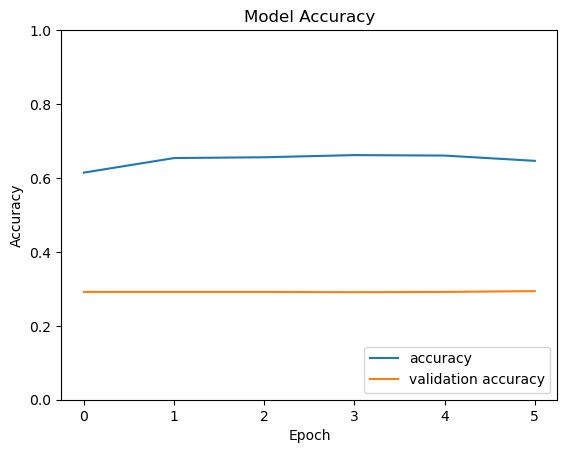

In [53]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

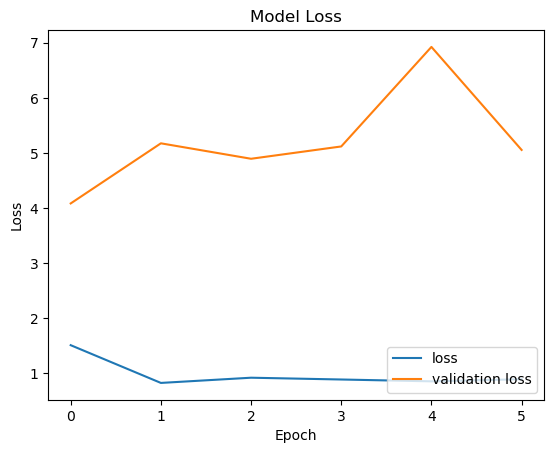

In [54]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [55]:
mi_predict2 = model4.predict(x_nodes_test4)

45/45 [==============================] - 8s 177ms/step


In [56]:
y_pred = np.argmax(mi_predict2, axis=1)
y = np.argmax(y_nodes_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[  0 216   0   0]
 [  0 368  14   1]
 [  0 130 242  34]
 [  0  24  63 324]]


In [57]:
onemisclass = 0+130+63+216+14+34
twomisclass = 0+24+0+1
threemisclass =  0+0
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[457, 25, 0]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

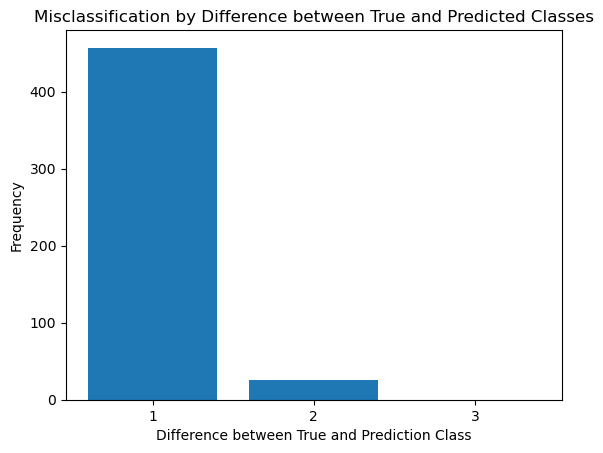

In [58]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')